In [156]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

fires = 'datasets/outputs/big_wildfires_2.csv'
temperatures = 'datasets/outputs/city_temp.csv'

data1 = pd.read_csv(fires)
data2 = pd.read_csv(temperatures)

data1['date'] = pd.to_datetime(data1['date'])
data2['date'] = pd.to_datetime(data2['date'])

# need to figure out how to get city names based on longitude/latitude in first dataset

data = data1.merge(data2, on=['date', 'city'])




In [301]:
print(len(data1))
print(len(data2))

862
29350


In [319]:
data2.groupby(data2['date'].dt.year)['max_temp'].max()

date
2000    110.0
2001    106.0
2002    110.0
2003    106.0
2004    104.0
2005    105.0
2006    116.0
2007    112.0
2008    111.0
2009    101.0
2010    113.0
2011    109.0
2012    107.0
2013    105.0
2014    108.0
2015    108.0
2016    112.0
2017    106.0
2018    108.0
2019     97.0
2020    111.0
2021     94.0
2022    103.0
2023     80.0
Name: max_temp, dtype: float64

In [158]:
# one hot encode the city column
# data['city'] = data['city'].map({'los_angeles': 1, 'san_fran': 2, 'san_diego': 3, 'riverside': 4})
data['city'] = data['city'].map({'los_angeles': 1, 'san_fran': 2})

In [159]:
# some visualizations on the existing data
data

,Unnamed: 0_x,date,latitude,longitude,satellite,instrument,avg_frp,surface_temp,confidence,fire_count,city,Unnamed: 0_y,max_temp,min_temp,mean_temp,rain
0,0,2001-01-03,32.802675,-116.687525,1.000000,1.0,1447.000000,324.825000,100.0,4,1,308,80.0,45.0,62.5,0.00
1,1,2001-05-27,39.984300,-119.658350,1.000000,1.0,959.850000,297.450000,100.0,2,2,452,63.0,51.0,57.0,0.00
2,2,2001-06-03,32.707500,-115.162300,1.000000,1.0,707.400000,322.200000,100.0,1,1,459,74.0,61.0,67.5,0.00
3,3,2001-07-27,38.610733,-119.633900,1.000000,1.0,1637.066667,321.933333,100.0,3,2,513,64.0,52.0,58.0,0.00
4,4,2001-08-05,41.754400,-114.269500,1.000000,1.0,780.700000,325.800000,100.0,1,2,522,69.0,56.0,62.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,857,2020-10-20,37.426400,-119.109900,2.000000,1.0,1874.700000,304.600000,100.0,1,2,7538,74.0,53.0,63.5,0.00
855,858,2020-10-21,37.407700,-119.075600,2.000000,1.0,754.050000,317.050000,100.0,2,2,7539,75.0,57.0,66.0,0.00
856,859,2020-10-24,37.394350,-119.117900,2.000000,1.0,1164.600000,295.450000,100.0,2,2,7542,66.0,54.0,60.0,0.00
857,860,2020-10-26,36.202667,-118.648550,1.333333,1.0,1346.283333,304.916667,100.0,6,1,7544,73.0,56.0,64.5,0.00


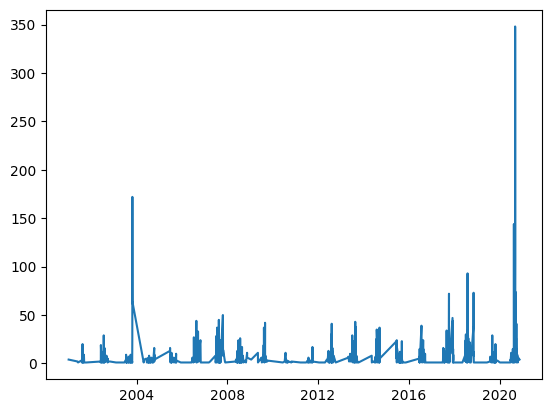

In [146]:
plt.plot(data1['date'], data1['fire_count'])
plt.show()

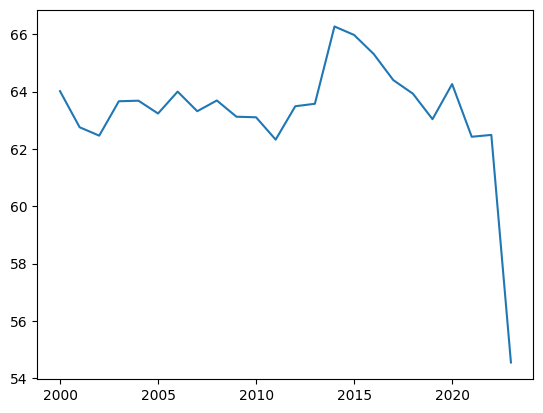

In [147]:
plt.plot(data2.groupby(data2['date'].dt.year)['mean_temp'].mean())
plt.show()
# data2.groupby(data2['date'].dt.year)['mean_temp'].mean()

In [325]:
data.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'instrument'], inplace=True)

data.to_csv('datasets/outputs/temp_and-fires.csv')


In [326]:
data = pd.read_csv('datasets/outputs/temp_and-fires.csv', parse_dates=['date'])

data.rename(columns={'Unnamed: 0': "record_#"}, inplace=True)

In [327]:
data.dtypes
data

,record_#,date,latitude,longitude,satellite,avg_frp,surface_temp,confidence,fire_count,city,max_temp,rain
0,0,2001-01-03,32.802675,-116.687525,1.000000,1447.000000,324.825000,100.0,4,1,80.0,0.00
1,1,2001-05-27,39.984300,-119.658350,1.000000,959.850000,297.450000,100.0,2,2,63.0,0.00
2,2,2001-06-03,32.707500,-115.162300,1.000000,707.400000,322.200000,100.0,1,1,74.0,0.00
3,3,2001-07-27,38.610733,-119.633900,1.000000,1637.066667,321.933333,100.0,3,2,64.0,0.00
4,4,2001-08-05,41.754400,-114.269500,1.000000,780.700000,325.800000,100.0,1,2,69.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
854,854,2020-10-20,37.426400,-119.109900,2.000000,1874.700000,304.600000,100.0,1,2,74.0,0.00
855,855,2020-10-21,37.407700,-119.075600,2.000000,754.050000,317.050000,100.0,2,2,75.0,0.00
856,856,2020-10-24,37.394350,-119.117900,2.000000,1164.600000,295.450000,100.0,2,2,66.0,0.00
857,857,2020-10-26,36.202667,-118.648550,1.333333,1346.283333,304.916667,100.0,6,1,73.0,0.00


In [9]:
counts = pd.DataFrame(data.groupby(data['date'].dt.year)['fire_count'].sum())

In [10]:
avgfrp = pd.DataFrame(data.groupby(data['date'].dt.year)['avg_frp'].mean())

In [11]:
newMerge = pd.merge(counts, avgfrp, on = 'date')
newMerge = newMerge.reset_index()
newMerge

,date,fire_count,avg_frp
0,2001,73,2765.323077
1,2002,268,2682.025595
2,2003,391,2207.810613
3,2004,131,2340.619209
4,2005,51,2255.825833
5,2006,433,2484.444303
6,2007,921,2673.051990
7,2008,203,2281.943833
8,2009,200,2834.168707
9,2010,12,1857.325000


In [12]:
# newMerge['date'] = newMerge['date'].astype(int)
newMerge[['date', 'fire_count']]

,date,fire_count
0,2001,73
1,2002,268
2,2003,391
3,2004,131
4,2005,51
5,2006,433
6,2007,921
7,2008,203
8,2009,200
9,2010,12


In [13]:
model = LinearRegression()
x = newMerge.drop(columns = ['fire_count'])
y = newMerge['fire_count']
model.fit(x, y)

LinearRegression()

In [14]:
model.score(x, y)

0.17991108030702474

In [15]:
len(yhat)

NameError: name 'yhat' is not defined

In [ ]:
yhat = model.predict(x)
y = y.to_numpy()
#print(yhat, y)
#print(accuracy_score(yhat, y))

In [ ]:
print(type(yhat[0]))

<class 'numpy.float64'>


In [257]:
# metrics to measure stuff
from sklearn.metrics import *
from sklearn.metrics import precision_score, r2_score, mean_squared_error, recall_score, accuracy_score, f1_score


def classification_metrics(Y_pred, Y_true):
    accuracy, precision, recall, f1score = accuracy_score(Y_true, Y_pred), \
                                           precision_score(Y_true, Y_pred, average='weighted', zero_division=0), \
                                           recall_score(Y_true, Y_pred, average='weighted', zero_division=0), \
                                           f1_score(Y_true, Y_pred, average='weighted')
    return precision, accuracy, recall, f1score

def regression_metrics(Y_pred, Y_true):
    r2, mse, rmse = r2_score(Y_true, Y_pred), \
                    mean_squared_error(Y_true, Y_pred, squared=False), \
                    mean_squared_error(Y_true, Y_pred, squared=True)
    return r2, mse, rmse

In [ ]:
len(yhat) == len(y)
print(len(yhat))
print(len(y))

20
20


In [ ]:
print(regression_metrics(yhat, y))

(0.17991108030702474, 330.97985507099503, 109547.66446281687)


In [ ]:
accuracy_score
f1_score
precision_score

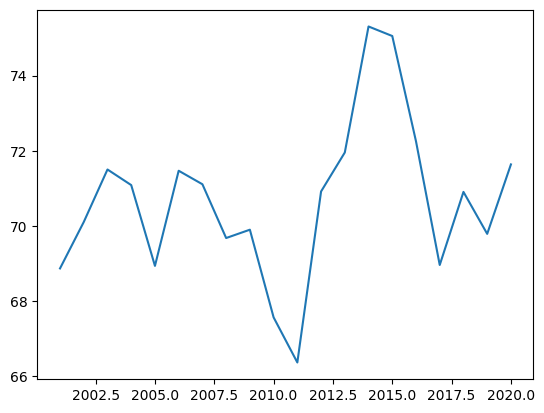

In [ ]:
plt.plot(data.groupby(data['date'].dt.year)['mean_temp'].mean())
# get graph of derivative
plt.show()

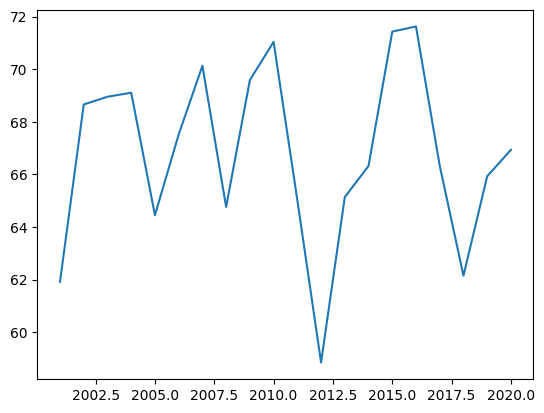

In [161]:
plt.plot(data.groupby(data['date'].dt.year)['mean_temp'].mean())
# get graph of derivative
plt.show()

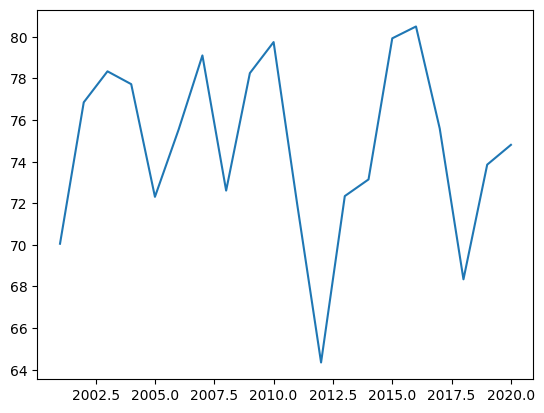

In [162]:
plt.plot(data.groupby(data['date'].dt.year)['max_temp'].mean())
# get graph of derivative
plt.show()

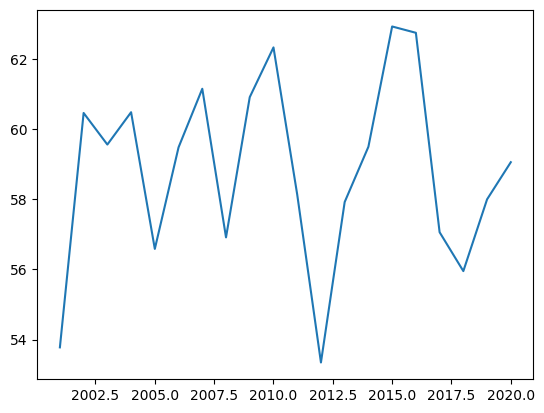

In [164]:
plt.plot(data.groupby(data['date'].dt.year)[' min_temp'].mean())
# get graph of derivative
plt.show()

## Descriptive analysis

In [221]:
# Descriptive analysis -- lets import first

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, cohen_kappa_score, make_scorer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
import scipy.stats as stats

In [166]:
# after seeing correlation matrix I want to drop min and mean temp
data.drop(columns=[' min_temp', 'mean_temp'], inplace=True)
data

,Unnamed: 0_x,date,latitude,longitude,satellite,instrument,avg_frp,surface_temp,confidence,fire_count,city,Unnamed: 0_y,max_temp,rain
0,0,2001-01-03,32.802675,-116.687525,1.000000,1.0,1447.000000,324.825000,100.0,4,1,308,80.0,0.00
1,1,2001-05-27,39.984300,-119.658350,1.000000,1.0,959.850000,297.450000,100.0,2,2,452,63.0,0.00
2,2,2001-06-03,32.707500,-115.162300,1.000000,1.0,707.400000,322.200000,100.0,1,1,459,74.0,0.00
3,3,2001-07-27,38.610733,-119.633900,1.000000,1.0,1637.066667,321.933333,100.0,3,2,513,64.0,0.00
4,4,2001-08-05,41.754400,-114.269500,1.000000,1.0,780.700000,325.800000,100.0,1,2,522,69.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,857,2020-10-20,37.426400,-119.109900,2.000000,1.0,1874.700000,304.600000,100.0,1,2,7538,74.0,0.00
855,858,2020-10-21,37.407700,-119.075600,2.000000,1.0,754.050000,317.050000,100.0,2,2,7539,75.0,0.00
856,859,2020-10-24,37.394350,-119.117900,2.000000,1.0,1164.600000,295.450000,100.0,2,2,7542,66.0,0.00
857,860,2020-10-26,36.202667,-118.648550,1.333333,1.0,1346.283333,304.916667,100.0,6,1,7544,73.0,0.00


C:\Users\azaan\AppData\Local\Temp\ipykernel_41568\2006559383.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()
C:\Users\azaan\AppData\Local\Temp\ipykernel_41568\2006559383.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot: >

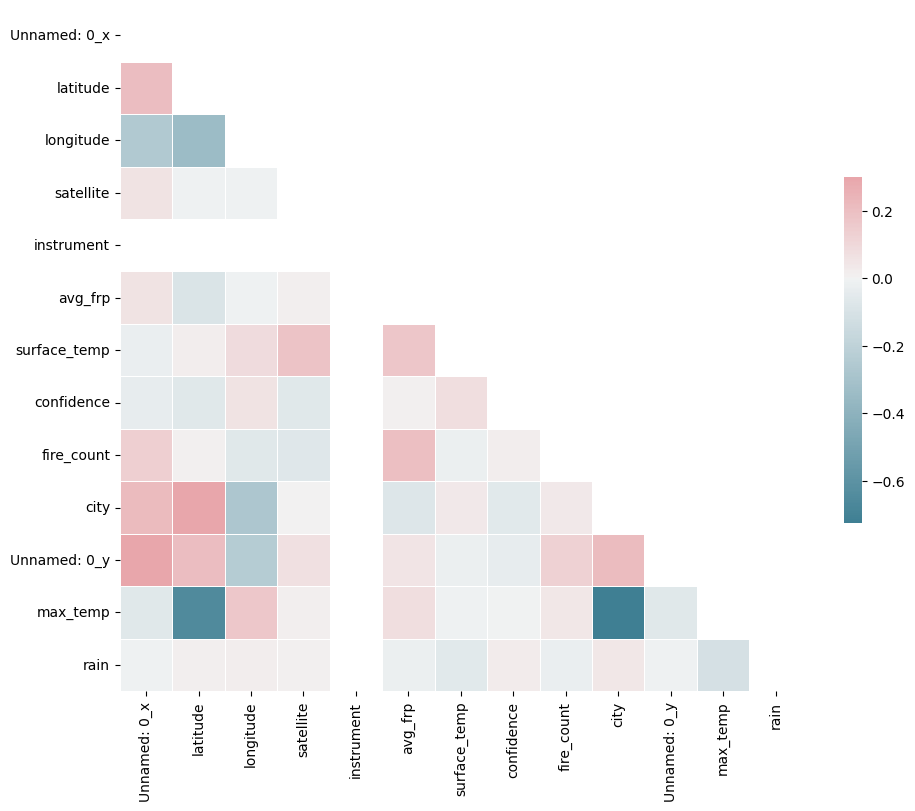

In [167]:
#correlation matrix
corr_matrix = data.corr()

#generate mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

#draw heatmap with mask and correct aspect ratio
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [168]:
data.dtypes

Unnamed: 0_x             int64
date            datetime64[ns]
latitude               float64
longitude              float64
satellite              float64
instrument             float64
avg_frp                float64
surface_temp           float64
confidence             float64
fire_count               int64
city                     int64
Unnamed: 0_y             int64
max_temp               float64
rain                   float64
dtype: object

In [169]:
# So not much correlated, let's run PCA

seed = 25
scaler = StandardScaler()
scaled_data = data.drop(columns=['date'])
pca_data = pd.DataFrame(scaler.fit_transform(scaled_data), index=scaled_data.index, columns=scaled_data.columns)
# print(pca_data)
x = pca_data.drop(['fire_count'], axis=1)
y = pca_data['fire_count']
pca = PCA(5, random_state=seed)

x_pca = pca.fit_transform(x)
# see difference in number of columns
print(x.shape)     # 12 columns
print(x_pca.shape) # 10 columns
# can also use this
print(pca.n_components_)

# to see importance of each new column in the PCA x
# print(scaled_data.columns)
print(pca.explained_variance_ratio_)

(859, 12)
(859, 5)
5
[0.26465734 0.1664484  0.114626   0.09644437 0.09270553]


In [170]:
# get PCA x and make into df
pca_df = pd.DataFrame(data = x_pca,
                            columns = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5'])
pca_final_df = pd.concat([pca_df, y], axis = 1)
pca_final_df['fire_count'].max()
# pca_data['avg_frp'].median()

16.7133710936963

In [171]:
len(data.columns)

14

In [172]:
# from PCA we can tell that not 1 single column is that strongly correlated
# now I will try and use ANOVA


fvalue, pvalue = stats.f_oneway(scaled_data[scaled_data.columns[0]], scaled_data[scaled_data.columns[1]], scaled_data[scaled_data.columns[2]], scaled_data[scaled_data.columns[3]], scaled_data[scaled_data.columns[4]],
                                     scaled_data[scaled_data.columns[5]], scaled_data[scaled_data.columns[6]], scaled_data[scaled_data.columns[7]], scaled_data[scaled_data.columns[8]], scaled_data[scaled_data.columns[9]], 
                                     scaled_data[scaled_data.columns[10]])
print(fvalue, pvalue)

3368.3131976693076 0.0


In [173]:
# Can tell data is significant bease, P < 0.05 and F is large
data.columns

Index(['Unnamed: 0_x', 'date', 'latitude', 'longitude', 'satellite',
       'instrument', 'avg_frp', 'surface_temp', 'confidence', 'fire_count',
       'city', 'Unnamed: 0_y', 'max_temp', 'rain'],
      dtype='object')

## Modelling

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [198]:
for c in data.columns:
    print("---- %s ---" % c)
    print(len(data[c].value_counts()))

---- Unnamed: 0_x ---
859
---- date ---
859
---- latitude ---
859
---- longitude ---
858
---- satellite ---
138
---- instrument ---
1
---- avg_frp ---
857
---- surface_temp ---
751
---- confidence ---
126
---- fire_count ---
60
---- city ---
2
---- Unnamed: 0_y ---
859
---- max_temp ---
50
---- rain ---
13


In [ ]:
data = data.drop(columns=[decision_variable, 'date', 'instrument','city'])

In [418]:
#globals
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV
seed = 25

def train_test_splitting(data, decision_variable = 'fire_count', test_size=0.3, seed=seed, scale_data=False):

    # x and y
    # if len(data.columns) > 10:
    #     x = data.drop(columns=[decision_variable, 'date', 'instrument','city'])
    # else:
    date = data[['date', 'record_#']].copy(deep=True)
    x = data.drop(columns=[decision_variable, 'date'])
    y = data[decision_variable]

    if scale_data==True:
        scaler = StandardScaler()
        x = scaler.fit_transform(x)
    
    #declare training splits
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
    return X_train, X_test, y_train, y_test, date

In [365]:
data.columns

Index(['record_#', 'date', 'latitude', 'longitude', 'satellite', 'avg_frp',
       'surface_temp', 'confidence', 'fire_count', 'city', 'max_temp', 'rain'],
      dtype='object')

In [378]:
# use logistic regression and see results
def log_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression(solver='liblinear', random_state=seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # r2, mse, rmse
    print(regression_metrics(y_test, y_pred))

    # return y_pred
    return y_pred

In [379]:
X_train, X_test, y_train, y_test = train_test_splitting(data)
log_pred = log_regression(X_train, X_test, y_train, y_test)

(-0.41575528704611964, 30.172501470067747, 910.3798449612403)


In [368]:
# logistic regression is pretty trash let's use something else

pandas.core.frame.DataFrame

In [419]:
def rand_forest_classifier(X_train, X_test, y_train, y_test, hyper_tuning = False):

    k = 0

    if hyper_tuning == True:
        hyperparam_grid = {'n_estimators': [3, 100, 1000],
            'max_features': [0.05, 0.5, 0.95],
            'max_depth': [10, 50, 100, None]}

        grid_scorer = make_scorer(cohen_kappa_score)
        rand_forest = GridSearchCV(RandomForestClassifier(), hyperparam_grid, cv=kf, scoring=grid_scorer)
        rand_forest.fit(x, y)

        print('best score'. rand_forest.best_score_)
        print('best params', rand_forest.best_params_)
        k = rand_forest.best_params_

    # Using Random Forest
    if k == 0:
        rand_forest = RandomForestClassifier()
    else:
        rand_forest = RandomForestClassifier(k)
    rand_forest.fit(X_train, y_train)
    y_pred = rand_forest.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    baseline_acc = len(y_test[y_test == 0]) / len(y_test)
    cohens_score = cohen_kappa_score(y_test, y_pred)
    print('baseline accuracy', baseline_acc)
    print('cohens score', cohens_score)

    #classification score
    #accuracy, precision, recall, f1score
    print('classification metrics (accuracy, precision, recall, f1score)', classification_metrics(y_pred, y_test))
    print('regression metrics (r2, mse, rmse)', regression_metrics(y_pred, y_test))
        
    # return y_pred
    return y_pred

In [420]:
def k_folding(X_train, X_test, y_train, y_test, num_splits = 10, hyper_tuning = False):
    from sklearn.model_selection import StratifiedKFold
    fold_perf = []

    kf = StratifiedKFold(n_splits=num_splits, shuffle=True)
    for train_index, test_index in kf.split(x, y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        y_pred = rand_forest_classifier(X_train, X_test, y_train, y_test, hyper_tuning)

        acc_score = accuracy_score(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        fold_perf.append(r2)
        # print('class metrics', classification_metrics(y_pred, y_test))
        # print('regress metrics', regression_metrics(y_pred, y_test))

    plt.plot(fold_perf)
    return(y_pred)

baseline accuracy 0.0
cohens score 0.0925938451132905
classification metrics (accuracy, precision, recall, f1score) (0.17086026341049168, 0.1937984496124031, 0.1937984496124031, 0.1674974493606398)
regression metrics (r2, mse, rmse) (0.1194858323779967, 19.372020901249556, 375.2751937984496)


c:\Users\azaan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


baseline accuracy 0.0
cohens score 0.12833554474421316
classification metrics (accuracy, precision, recall, f1score) (0.18038290388680311, 0.23255813953488372, 0.23255813953488372, 0.20247004958359271)
regression metrics (r2, mse, rmse) (0.57681816304978, 16.81997704834869, 282.9116279069767)
baseline accuracy 0.0
cohens score 0.15899921275339501
classification metrics (accuracy, precision, recall, f1score) (0.20276921127367314, 0.26046511627906976, 0.26046511627906976, 0.22595129620600002)
regression metrics (r2, mse, rmse) (-0.10650724195900296, 12.975468804543226, 168.36279069767443)
baseline accuracy 0.0
cohens score 0.13580998781973197
classification metrics (accuracy, precision, recall, f1score) (0.19995661610758178, 0.23255813953488372, 0.23255813953488372, 0.21247552447552448)
regression metrics (r2, mse, rmse) (-2.2647886189596984, 23.653604868091755, 559.4930232558139)
baseline accuracy 0.0
cohens score 0.15849321244301962
classification metrics (accuracy, precision, recall, 

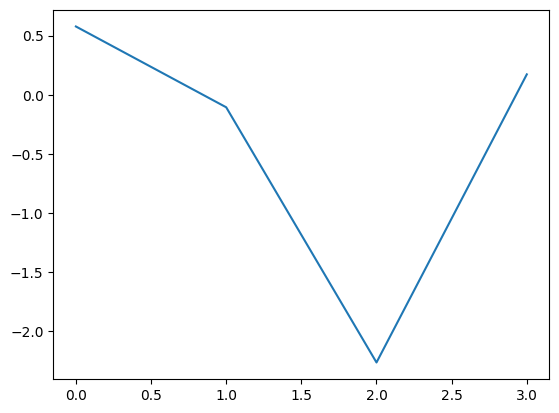

In [421]:
X_train, X_test, y_train, y_test, date = train_test_splitting(data)
rf_class_pred = rand_forest_classifier(X_train, X_test, y_train, y_test)
folding_perf = k_folding(X_train, X_test, y_train, y_test, 4)

In [425]:
print(rand_forest.feature_importances_)
print(X_train.columns)

[0.07824742 0.11165353 0.10985316 0.12918465 0.22305946 0.13883825
 0.03625028 0.07551562 0.09461917 0.00277845]
Index(['record_#', 'latitude', 'longitude', 'satellite', 'avg_frp',
       'surface_temp', 'confidence', 'city', 'max_temp', 'rain'],
      dtype='object')


In [309]:
# # DO this all again, but with another dependent variable
# # Not working atm, I need to use RandomForestRegressor, might not be worth 


# X_train, X_test, y_train, y_test = train_test_splitting(data, decision_variable = 'avg_frp', test_size=0.3, seed=seed)
# log_pred2 = log_regression(X_train, X_test, y_train, y_test)
# folding_pred2 = k_folding(X_train, X_test, y_train, y_test)
# rf_class_pred2 = rand_forest_classifier(X_train, X_test, y_train, y_test)


In [311]:
##### JUNK

# #create hyperparameters in order to cross-validate the model
# hyperparam_grid = {'n_estimators': [3, 100, 1000],
#                    'max_features': [0.05, 0.5, 0.95],
#                    'max_depth': [10, 50, 100, None]}

# grid_scorer = make_scorer(cohen_kappa_score)
# rand_forest = GridSearchCV(RandomForestClassifier(), hyperparam_grid, cv=kf, scoring=grid_scorer)
# rand_forest.fit(x, y)

# print(rand_forest.best_score_)
# print(rand_forest.best_params_)

# rand_forest = RandomForestClassifier(max_depth= 10, max_features= 0.95, n_estimators= 100)
# y_pred = rand_forest.fit(X_train, y_train).predict(X_test)

# acc_score = accuracy_score(y_test, y_pred)
# baseline_acc = len(y[y == 0]) / len(y) 
# cohens_score = cohen_kappa_score(y_test, y_pred)
# print(acc_score, baseline_acc, cohens_score)

# #use K-folds with best parameters
# from sklearn.model_selection import StratifiedKFold
# fold_perf = []
# rand_forest = RandomForestClassifier(max_depth= 10, max_features= 0.95, n_estimators= 100)

# kf = StratifiedKFold(n_splits=10, shuffle=True)
# for train_index, test_index in kf.split(x, y):
#     X_train, X_test = x.iloc[train_index], x.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#     rand_forest.fit(X_train, y_train)
#     y_pred = rand_forest.predict(X_test)

#     acc_score = accuracy_score(y_test, y_pred)
#     fold_perf.append(acc_score)
#     print('class metrics', classification_metrics(y_pred, y_test))
#     print('regress metrics', regression_metrics(y_pred, y_test))

# plt.plot(fold_perf)


In [312]:
print(len(X_train))
print(len(X_test))
print(len(rf_class_pred))

601
258
258


## Neural Networks

In [372]:
# let's use another model to do regression instead of classification to get a better score
type(X_train) == type(data)

True

In [394]:
# let's define a NN that can do regression
import copy
import tqdm
import torch.nn as nn
import torch.optim as optim

# split the dataset with scaled data to fit better into the linear regression
X_train, X_test, y_train, y_test = train_test_splitting(data, decision_variable = 'fire_count', test_size=0.3, seed=seed, scale_data = True)

# First make the model
model = nn.Sequential(
    nn.Linear(10, 6),
    nn.ReLU(),
    # nn.Linear(24, 12),
    # nn.ReLU(),
    # nn.Linear(12, 6),
    # nn.ReLU(),
    nn.Linear(6, 1)
)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# make data into tensore
if type(X_train) == type(data):
    X_train = torch.from_numpy(X_train.values).float()
    X_test = torch.from_numpy(X_test.values).float()
else:
    X_train = torch.from_numpy(X_train).float()
    X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train.values).float().reshape(-1, 1)
y_test = torch.from_numpy(y_test.values).float().reshape(-1, 1)

# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

MSE: 477.50
RMSE: 21.85


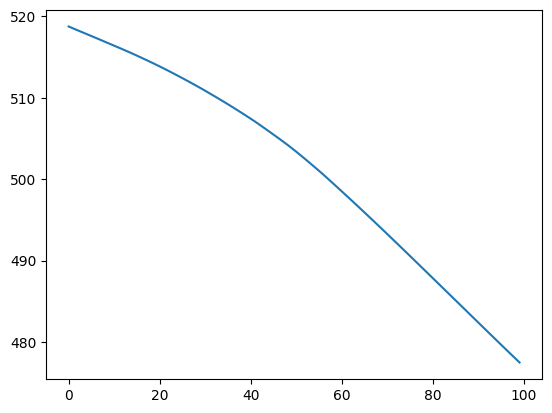

In [395]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [141]:
new = X_test.copy(deep=True)
new['y_test'] = y_test
new['y_pred'] = y_pred
new

,record_#,latitude,longitude,satellite,avg_frp,surface_temp,confidence,city,max_temp,rain,y_test,y_pred
311,311,40.247850,-119.429050,1.00000,2735.500000,345.900000,100.000000,2,65.0,0.00,2,1
355,355,41.707325,-116.091600,2.00000,2929.950000,317.650000,100.000000,2,61.0,0.00,4,3
417,417,39.863400,-121.288100,2.00000,2044.400000,298.000000,100.000000,2,64.0,0.00,1,2
283,283,36.162900,-120.532500,1.00000,2393.350000,364.250000,100.000000,1,82.0,0.00,2,1
390,390,38.694175,-122.179275,1.50000,2226.500000,324.175000,100.000000,2,62.0,0.00,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
419,419,40.109025,-123.103175,2.00000,2394.725000,400.100000,100.000000,2,77.0,0.00,4,2
365,365,36.232256,-119.819163,1.37037,2532.618519,329.003704,99.037037,1,82.0,0.00,27,3
413,413,37.533000,-119.312800,2.00000,1790.200000,400.100000,100.000000,2,71.0,0.00,1,2
410,410,34.688333,-117.983633,1.50000,2329.333333,334.400000,100.000000,1,96.0,0.00,6,1


In [ ]:
plt.plot(new.groupby(new['date'].dt.year)['mean_temp'].mean())

KeyError: 'date'